In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%run configs.ipynb

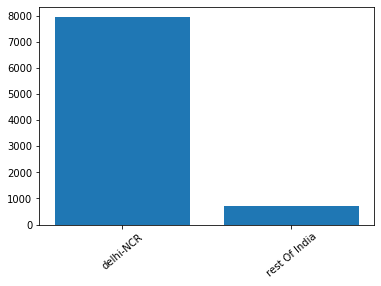

In [67]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['City'],inplace=True)
df=df[df['Country Code']==1]
cityCountSeries=df['City'].value_counts()
delhiNCR=cityCountSeries['New Delhi']+cityCountSeries['Gurgaon']+cityCountSeries['Noida']+cityCountSeries['Faridabad']+cityCountSeries['Ghaziabad']
restOfIndia=cityCountSeries.values.sum()-delhiNCR
plt.bar(['delhi-NCR','rest Of India'],[delhiNCR,restOfIndia])
plt.xticks(rotation=40)
plt.show()


In [70]:
def createCuisineSets(cuisine,city) :
    delhiNCRCuisineSet=set()
    restOfIndiaCuisineSet=set()
    for i in range(len(city)):
        if city.iloc[i]=='New Delhi' or city.iloc[i]=='Gurgaon' or city.iloc[i]=='Noida' or city.iloc[i]=='Faridabad' or city.iloc[i]=='Ghaziabad' :
            cuis=cuisine.iloc[i].strip().split(', ')
            for c in cuis:
                delhiNCRCuisineSet.add(c)
        else :
            cuis=cuisine.iloc[i].strip().split(', ')
            for c in cuis:
                restOfIndiaCuisineSet.add(c)
    
    return (delhiNCRCuisineSet,restOfIndiaCuisineSet)


df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['City'],inplace=True)
df=df[df['Country Code']==1]
cuisineSets=createCuisineSets(df['Cuisines'],df['City'])
diffCuis=cuisineSets[1].difference(cuisineSets[0])
print(diffCuis) 

{'BBQ', 'Cajun', 'German', 'Malwani'}


In [72]:
headers={'user-key':zomatoApiKey,'Accept': 'application/json'}
#first get the city id for Delhi NCR
query={'q':'Delhi NCR'}
res=requests.get('https://developers.zomato.com/api/v2.1/cities',headers=headers,params=query)
for loc in res.json().get('location_suggestions') :
    if loc.get('name')=='Delhi NCR' :
        cityid=loc.get('country_id')

query={'city_id':cityid}
res=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=headers,params=query)
allCuisine=set()
for cuisine in res.json().get('cuisines'):
    allCuisine.add(cuisine['cuisine']['cuisine_name'])

cuisineDf=pd.DataFrame(list(allCuisine))

cuisineDf.columns = ['CuisineName']
print(diffCuis.difference(allCuisine))

# so BBQ and Malwani are there in delhi NCR so data is incomplete in the csv file

{'Cajun', 'German'}


In [75]:
def createCuisineDict(cuisine,city) :
    delhiNCRCuisineSet={}
    restOfIndiaCuisineSet={}
    for i in range(len(city)):
        if city.iloc[i]=='New Delhi' or city.iloc[i]=='Gurgaon' or city.iloc[i]=='Noida' or city.iloc[i]=='Faridabad' or city.iloc[i]=='Ghaziabad' :
            cuis=cuisine.iloc[i].strip().split(', ')
            for c in cuis:
                delhiNCRCuisineSet[c]=delhiNCRCuisineSet.get(c,0)+1
        else :
            cuis=cuisine.iloc[i].strip().split(', ')
            for c in cuis:
                restOfIndiaCuisineSet[c]=restOfIndiaCuisineSet.get(c,0)+1
    
    return (delhiNCRCuisineSet,restOfIndiaCuisineSet)


df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['City'],inplace=True)
df=df[df['Country Code']==1]
cuisineDict=createCuisineDict(df['Cuisines'],df['City'])
delhiDataf=pd.DataFrame(list(cuisineDict[0].values()),list(cuisineDict[0].keys()))
restOfIndiaDataf=pd.DataFrame(list(cuisineDict[1].values()),list(cuisineDict[1].keys()))
delhiDataf=delhiDataf.sort_values(by=[0],ascending=False)
print("---------------Top 10 Cuisines in Delhi NCR --------------------------------")
for i in range(10):    
    print(delhiDataf.index[i],delhiDataf.iloc[i][0])
print("---------------Top 10 Cuisines in rest of india ----------------------------")
restOfIndiaDataf=restOfIndiaDataf.sort_values(by=[0],ascending=False)
for i in range(10):
    print(restOfIndiaDataf.index[i],restOfIndiaDataf.iloc[i][0])
    


---------------Top 10 Cuisines in Delhi NCR --------------------------------
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
---------------Top 10 Cuisines in rest of india ----------------------------
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


Index(['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Bakery',
       'South Indian', 'Continental', 'Desserts', 'Street Food', 'Italian'],
      dtype='object')
[3597 2448 1866  933  697  569  547  542  538  535]
Index(['North Indian', 'Chinese', 'Continental', 'Italian', 'Cafe',
       'Fast Food', 'South Indian', 'Mughlai', 'Desserts', 'Mexican'],
      dtype='object')
[349 242 177 147 136  97  62  59  55  50]


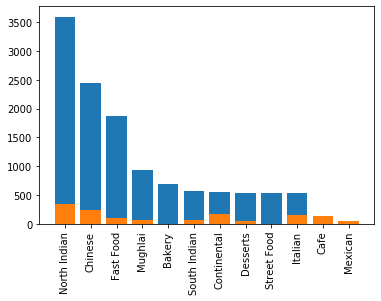

In [76]:
def createCuisineSets(cuisine,city) :
    delhiNCRCuisineSet={}
    restOfIndiaCuisineSet={}
    for i in range(len(city)):
        if city.iloc[i]=='New Delhi' or city.iloc[i]=='Gurgaon' or city.iloc[i]=='Noida' or city.iloc[i]=='Faridabad' or city.iloc[i]=='Ghaziabad' :
            cuis=cuisine.iloc[i].strip().split(', ')
            for c in cuis:
                delhiNCRCuisineSet[c]=delhiNCRCuisineSet.get(c,0)+1
        else :
            cuis=cuisine.iloc[i].strip().split(', ')
            for c in cuis:
                restOfIndiaCuisineSet[c]=restOfIndiaCuisineSet.get(c,0)+1
    
    return (delhiNCRCuisineSet,restOfIndiaCuisineSet)


df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['City'],inplace=True)
df=df[df['Country Code']==1]
cuisineDict=createCuisineSets(df['Cuisines'],df['City'])
delhiDataf=pd.DataFrame(list(cuisineDict[0].values()),list(cuisineDict[0].keys()))
restOfIndiaDataf=pd.DataFrame(cuisineDict[1].values(),list(cuisineDict[1].keys()))
delhiDataf=delhiDataf.sort_values(by=[0],ascending=False)
delhiDataf.columns=['count']
print(delhiDataf.index[0:10])
print(delhiDataf['count'].values[0:10])

restOfIndiaDataf=restOfIndiaDataf.sort_values(by=[0],ascending=False)
restOfIndiaDataf.columns=['count']
print(restOfIndiaDataf.index[0:10])
print(restOfIndiaDataf['count'].values[0:10])
# for i in range(10):    
#     print(delhiDataf.index[i],delhiDataf.iloc[i][0])
# print("---------------")
# restOfIndiaDataf=restOfIndiaDataf.sort_values(by=[0],ascending=False)
# print(restOfIndiaDataf)
# for i in range(10):
#     print(restOfIndiaDataf.index[i],restOfIndiaDataf.iloc[i][0])
# print((np.array(delhiDataf.index[0:10])))
# # print(restOfIndiaDataf[0][0:10][0:10])
# # plt.bar(np.array(delhiDataf.index[0:10]),c,width=0.6)
plt.bar(delhiDataf.index[0:10],delhiDataf['count'].values[0:10])
plt.bar(restOfIndiaDataf.index[0:10],restOfIndiaDataf['count'].values[0:10])
plt.xticks(rotation = (90))
plt.show()

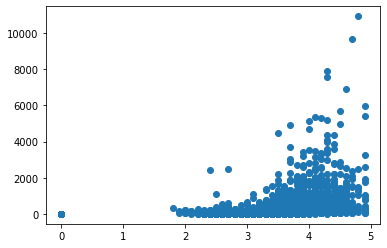

In [77]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['Restaurant Name'],inplace=True)
df=df[df['Country Code']==1]
plt.scatter(df['Aggregate rating'],df['Votes'])
plt.show()

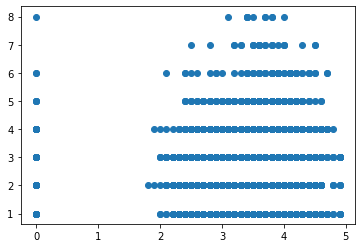

In [78]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['Restaurant Name'],inplace=True)
df=df[df['Country Code']==1]
df['CuisinesCount']=df['Cuisines'].apply(lambda x: len(x.strip().split(', ')))
plt.scatter(df['Aggregate rating'],df['CuisinesCount'])
plt.show()

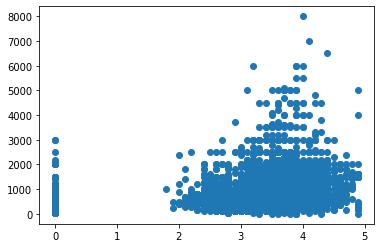

In [79]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['Restaurant Name'],inplace=True)
df=df[df['Country Code']==1]
plt.scatter(df['Aggregate rating'],df['Average Cost for two'])
plt.show()

In [80]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['Locality'],inplace=True)
df=df[df['Country Code']==1]
df['votes*rating']=df['Aggregate rating']*df['Votes']
df=df.groupby(['Locality']).sum()
# print(df.describe())
df['weighted restaurant rating']=df['votes*rating']/df['Votes']
# print(df.columns)
print(df['weighted restaurant rating'])


Locality
 ILD Trade Centre Mall, Sohna Road     2.816667
12th Square Building, Banjara Hills    4.300000
A Hotel, Gurdev Nagar                  3.600000
ARSS Mall, Paschim Vihar               3.100000
Aaya Nagar                             0.000000
                                         ...   
Yusuf Sarai                            3.299463
Z Square Mall, Mall Road               4.000000
Zakir Nagar                            0.000000
Zoo Tiniali                            4.219497
ibis New Delhi, Aerocity               3.100000
Name: weighted restaurant rating, Length: 784, dtype: float64


In [81]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['Locality'],inplace=True)
df=df[df['Country Code']==1]
df['votes*rating']=df['Aggregate rating']*df['Votes']
df=df.groupby(['Locality']).sum()
# print(df.describe())
df['weighted restaurant rating']=df['votes*rating']/df['Votes']
# print(df.columns)
df=df.sort_values(by=['weighted restaurant rating'],ascending=False)
print(df['weighted restaurant rating'][0:10])


Locality
Hotel Clarks Amer, Malviya Nagar    4.900000
Aminabad                            4.900000
Friends Colony                      4.886916
Powai                               4.841869
Kirlampudi Layout                   4.820161
Deccan Gymkhana                     4.800000
Express Avenue Mall,  Royapettah    4.800000
Banjara Hills                       4.718762
Sector 5, Salt Lake                 4.707023
Riverside Mall, Gomti Nagar         4.700000
Name: weighted restaurant rating, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

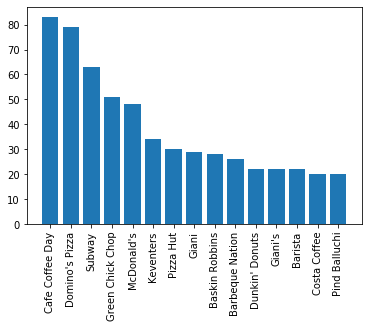

In [82]:
# top 15 rest having maximum number of outlets
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['Restaurant Name'],inplace=True)
restcount=df['Restaurant Name'].value_counts()
plt.bar(restcount.index[0:15],restcount.values[0:15])
plt.xticks(rotation=90)

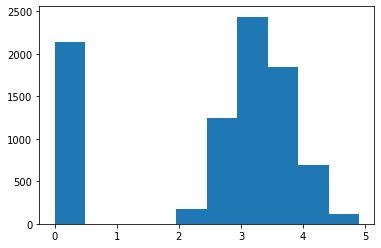

In [83]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df=df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating'],inplace=True)
plt.hist(df['Aggregate rating'])
plt.show()

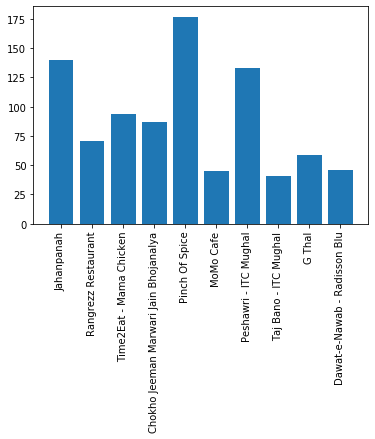

In [84]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df=df[df['Country Code']==1]
df.dropna(subset=['Restaurant Name'],inplace=True)
plt.bar(df['Restaurant Name'][0:10],df['Votes'][0:10])
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


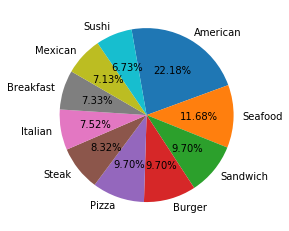

In [85]:
def createCuisineDict(cuisine,city) :
    usaCuisineDict={}
    for i in range(len(city)):
#         print(cuisine.iloc[i])
        cuis=cuisine.iloc[i].strip().split(', ')
        for c in cuis:
            usaCuisineDict[c]=usaCuisineDict.get(c,0)+1
                
    return (usaCuisineDict)

df1=pd.read_csv('zomato.csv',encoding='latin-1')
df1.dropna(subset=['Cuisines'],inplace=True)

df1=df1[df1['Country Code']==216]
cuisineDict=createCuisineDict(df1['Cuisines'],df1['City'])
usaDataf=pd.DataFrame(list(cuisineDict.values()),list(cuisineDict.keys()))
usaDataf=usaDataf.sort_values(by=[0],ascending=False)
plt.pie(usaDataf.values[0:10], labels=usaDataf.index[0:10], autopct="%.2f%%",counterclock=False,  startangle=100)
plt.show()

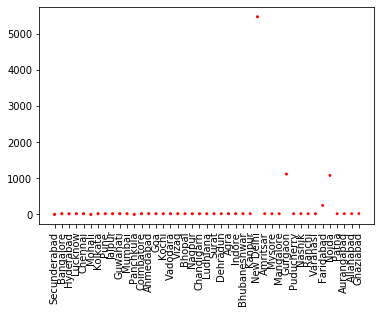

In [88]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.dropna(subset=['City'],inplace=True)
df=df[df['Country Code']==1]
df['votes*rating']=df['Aggregate rating']*df['Votes']
df.insert(1,'count',1)
df=df.groupby(['City']).sum()
# print(df.describe())
df['weighted restaurant rating']=df['votes*rating']/df['Votes']

# print(df.columns)
df=df.sort_values(by=['weighted restaurant rating'],ascending=False)
plt.scatter(df.index,df['count'],s=df['weighted restaurant rating'],c="r")
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


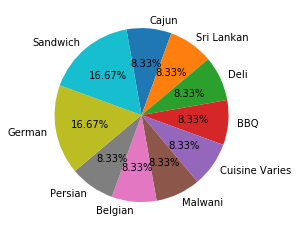

In [90]:
def createCuisineDict(cuisine,city) :
    usaCuisineDict={}
    for i in range(len(city)):
#         print(cuisine.iloc[i])
        cuis=cuisine.iloc[i].strip().split(', ')
        for c in cuis:
            usaCuisineDict[c]=usaCuisineDict.get(c,0)+1
                
    return (usaCuisineDict)

df1=pd.read_csv('zomato.csv',encoding='latin-1')
df1.dropna(subset=['Cuisines'],inplace=True)

df1=df1[df1['Country Code']==1]
cuisineDict=createCuisineDict(df1['Cuisines'],df1['City'])
usaDataf=pd.DataFrame(list(cuisineDict.values()),list(cuisineDict.keys()))
usaDataf=usaDataf.sort_values(by=[0])
plt.pie(usaDataf.values[0:10], labels=usaDataf.index[0:10], autopct="%.2f%%",counterclock=False,  startangle=100)
plt.show()